In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)


In [4]:
dataset=pd.read_csv('kidney_disease-ClassConvertToInt.csv')

## print shape of dataset with rows and columns
print(dataset.shape)


(400, 26)


In [5]:
dataset.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
nn=[]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  '% missing values')
    nn.append([feature,np.round(dataset[feature].isnull().mean(), 4)])

age 0.0225 % missing values
bp 0.03 % missing values
sg 0.1175 % missing values
al 0.115 % missing values
su 0.1225 % missing values
rbc 0.38 % missing values
pc 0.1625 % missing values
pcc 0.01 % missing values
ba 0.01 % missing values
bgr 0.11 % missing values
bu 0.0475 % missing values
sc 0.0425 % missing values
sod 0.2175 % missing values
pot 0.22 % missing values
hemo 0.13 % missing values
pcv 0.1775 % missing values
wc 0.265 % missing values
rc 0.3275 % missing values
htn 0.005 % missing values
dm 0.005 % missing values
cad 0.005 % missing values


In [11]:
nn

[['age', 0.0225],
 ['bp', 0.03],
 ['sg', 0.1175],
 ['al', 0.115],
 ['su', 0.1225],
 ['rbc', 0.38],
 ['pc', 0.1625],
 ['pcc', 0.01],
 ['ba', 0.01],
 ['bgr', 0.11],
 ['bu', 0.0475],
 ['sc', 0.0425],
 ['sod', 0.2175],
 ['pot', 0.22],
 ['hemo', 0.13],
 ['pcv', 0.1775],
 ['wc', 0.265],
 ['rc', 0.3275],
 ['htn', 0.005],
 ['dm', 0.005],
 ['cad', 0.005]]

In [12]:

dfNval = pd.DataFrame (nn, columns = ['Features', 'Missing Values'])
dfNval.to_csv('missingValues.csv', index=False)

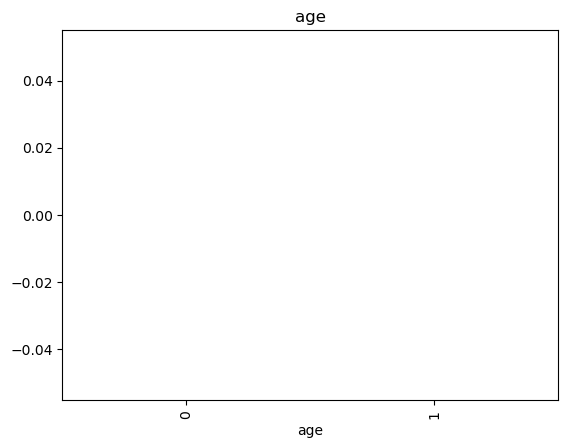

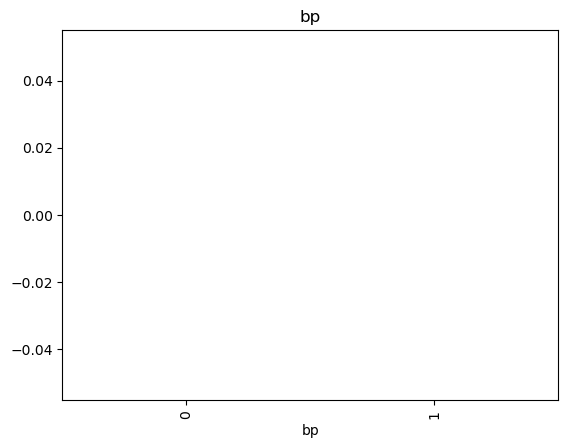

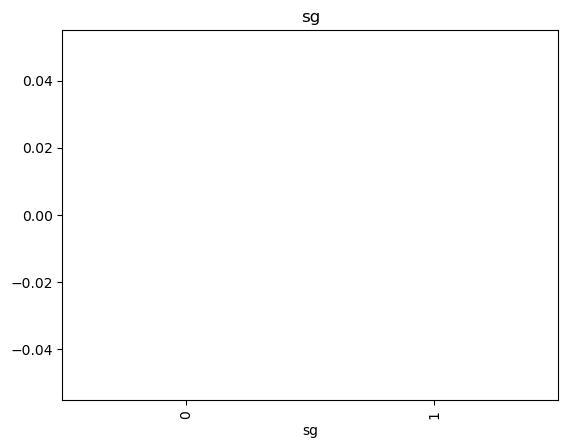

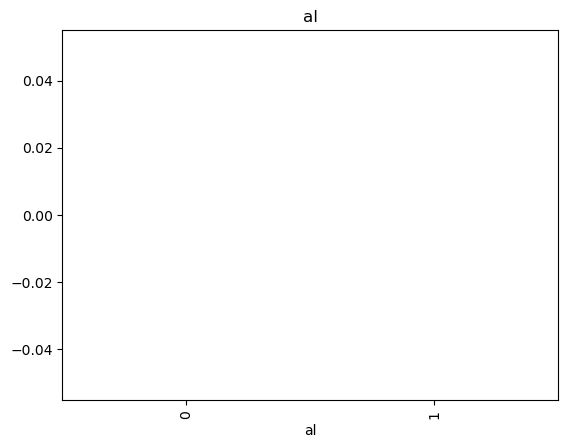

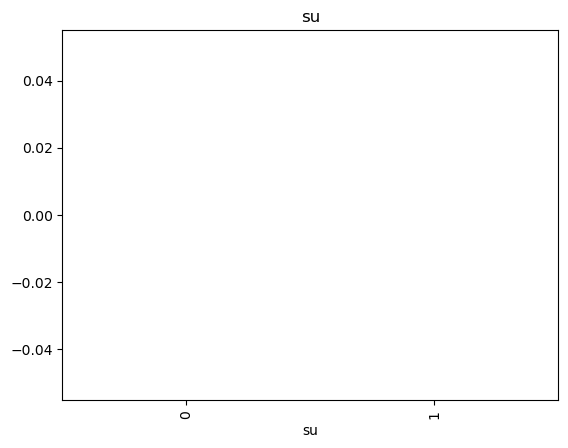

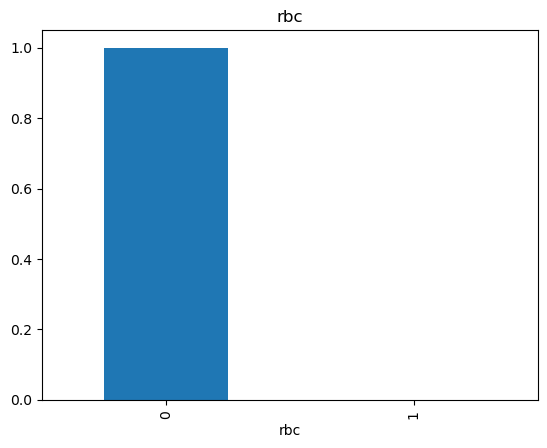

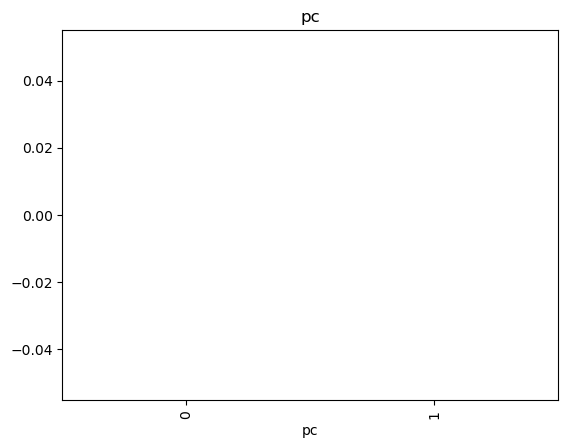

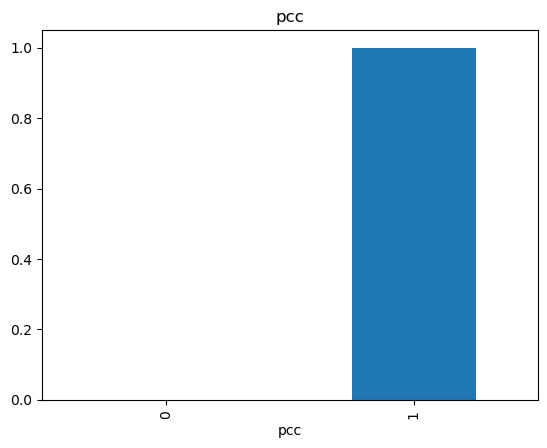

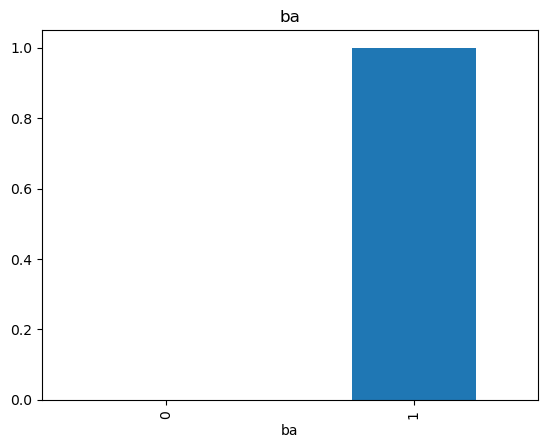

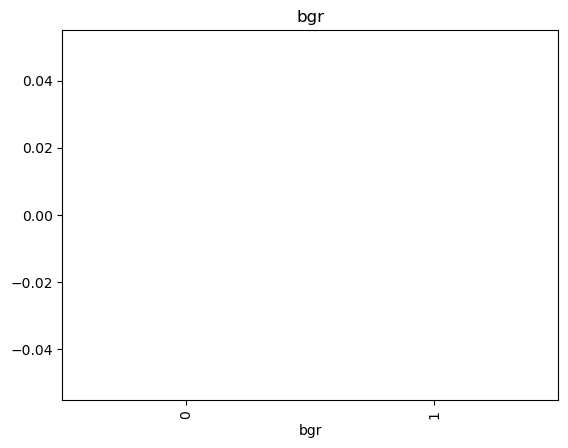

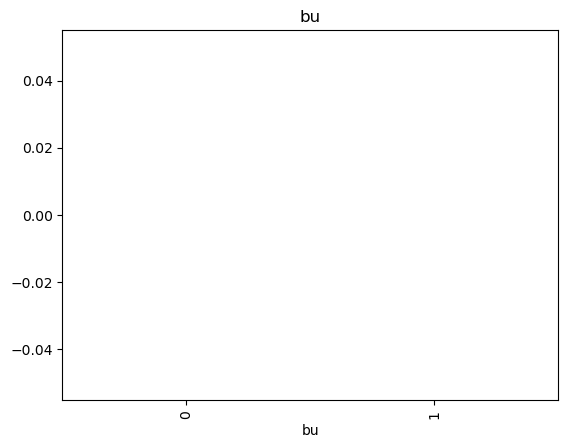

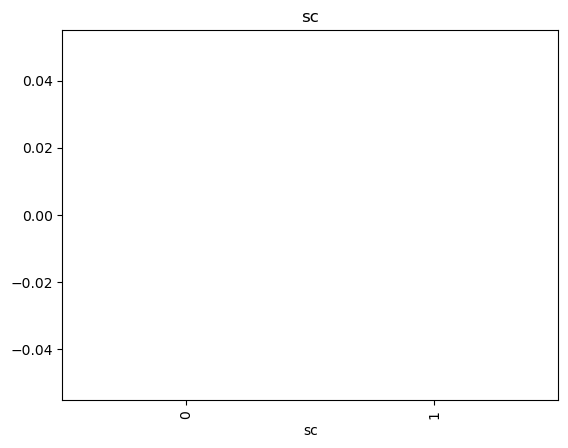

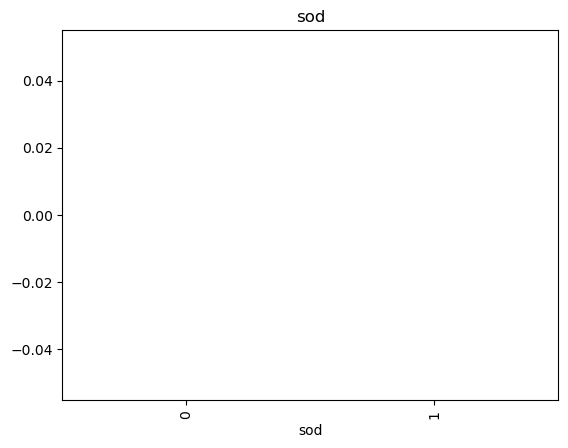

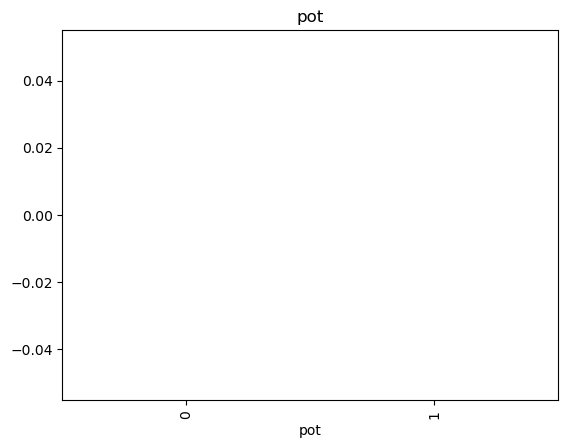

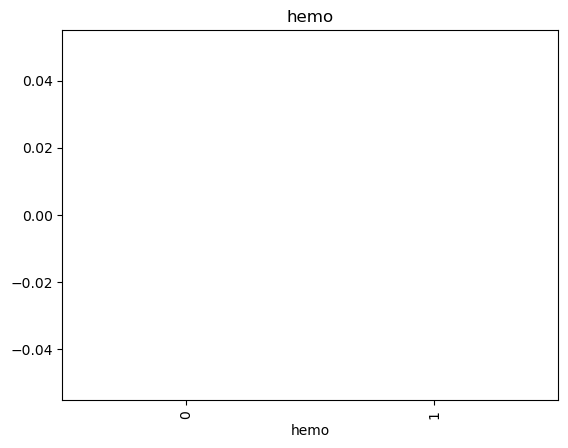

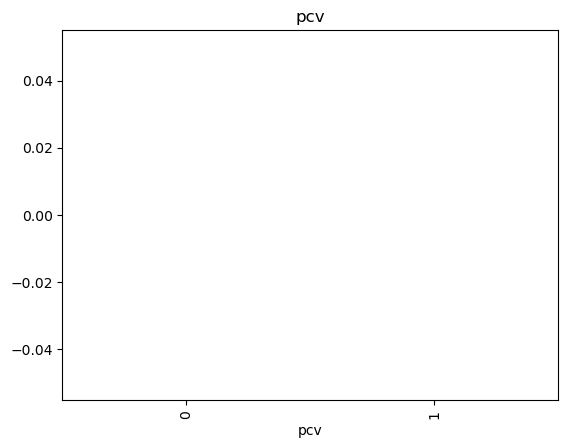

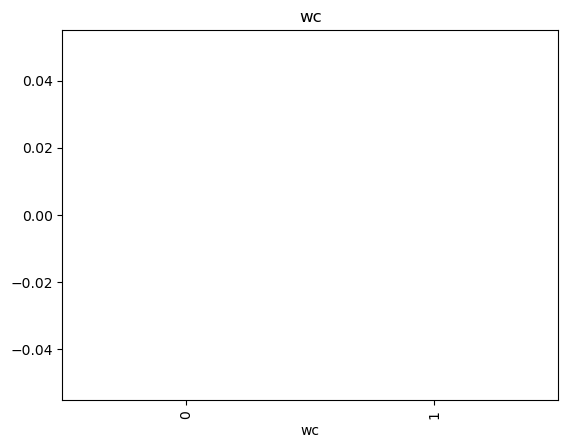

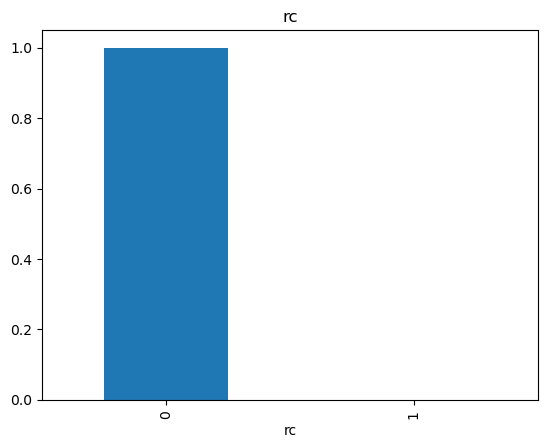

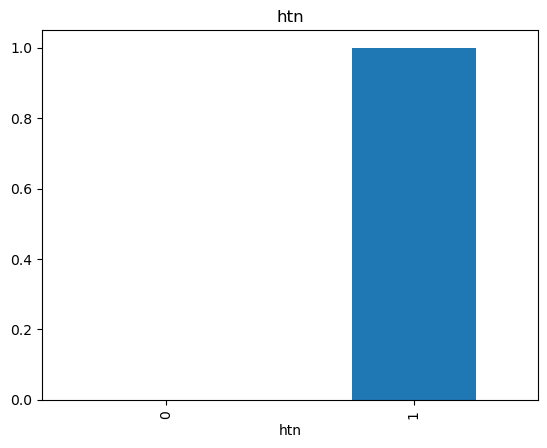

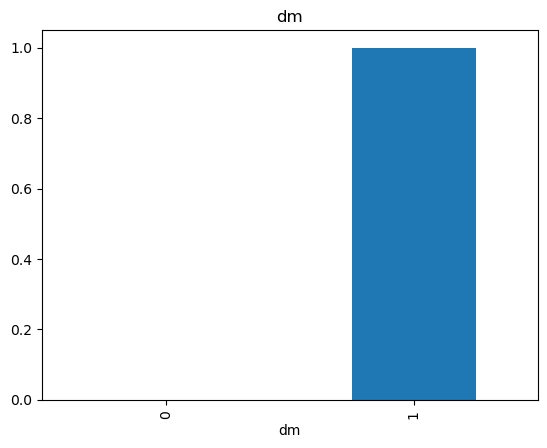

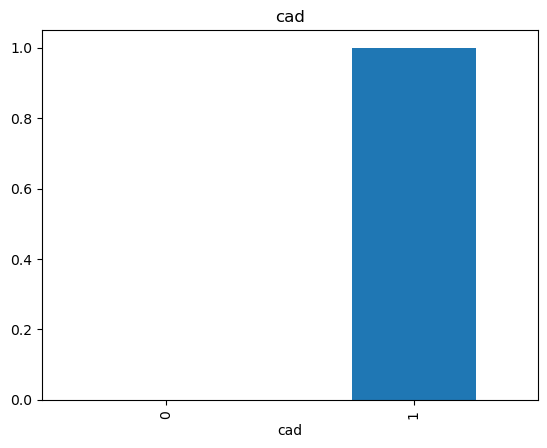

In [30]:
#Since they are many missing values, we need to find the relationship between missing values and Sales Price
#Let's plot some diagram for this relationship
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['classification'].median().plot.bar()
    plt.title(feature)
    plt.show()
    #Here With the relation between the missing values and the dependent variable is clearly visible.
    #So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [6]:
print("Id of Houses {}".format(len(dataset.Id)))

AttributeError: 'DataFrame' object has no attribute 'Id'

In [31]:
# Numerical Variables
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  16


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0


In [10]:
#Temporal Variables(Eg: Datetime Variables)
#From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.
#We will be performing this analysis in the Feature Engineering.
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature


[]

In [32]:
dataset[year_feature].head()

""
0
1
2
3
4


In [11]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

In [ ]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['classification'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [ ]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [33]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [34]:
discrete_feature

['bp', 'sg', 'al', 'su', 'classification']

In [35]:
dataset[discrete_feature].head()

,bp,sg,al,su,classification
0,80.0,1.020,1.0,0.0,0
1,50.0,1.020,4.0,0.0,0
2,80.0,1.010,2.0,3.0,0
3,70.0,1.005,4.0,0.0,0
4,80.0,1.010,2.0,0.0,0


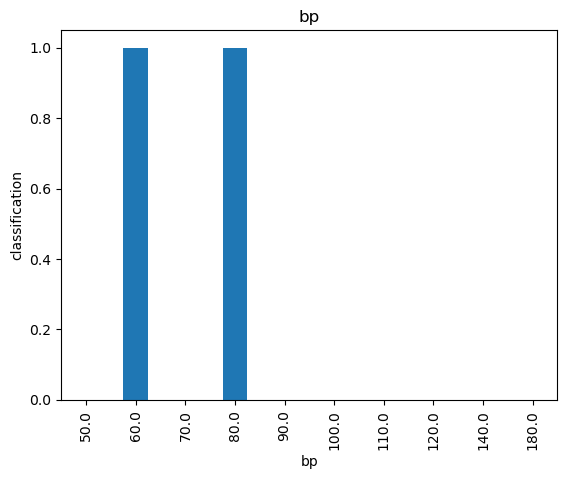

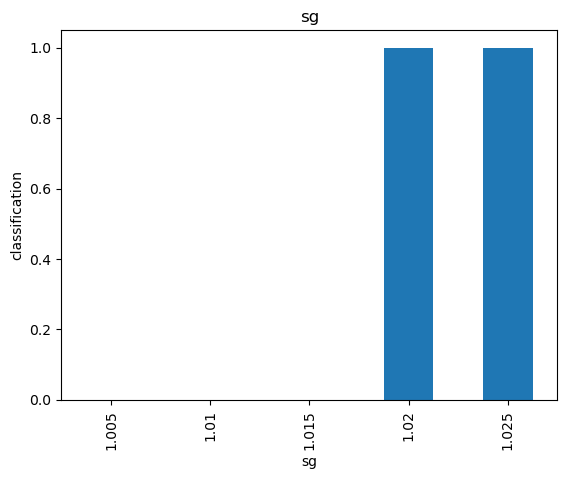

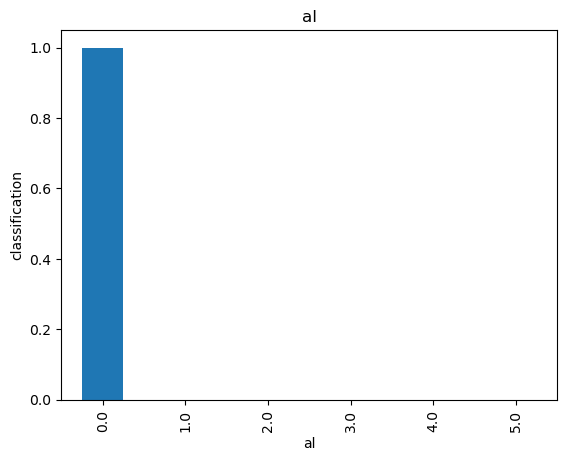

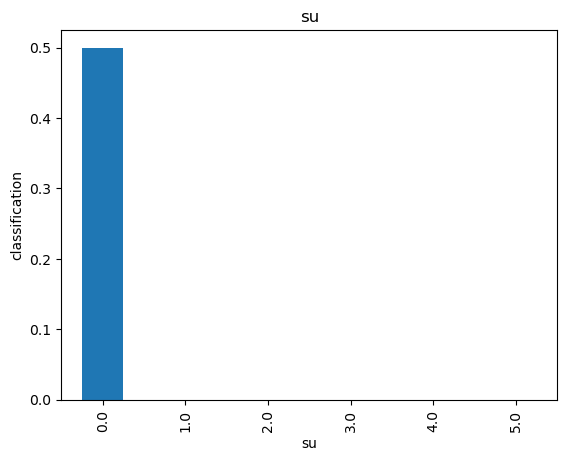

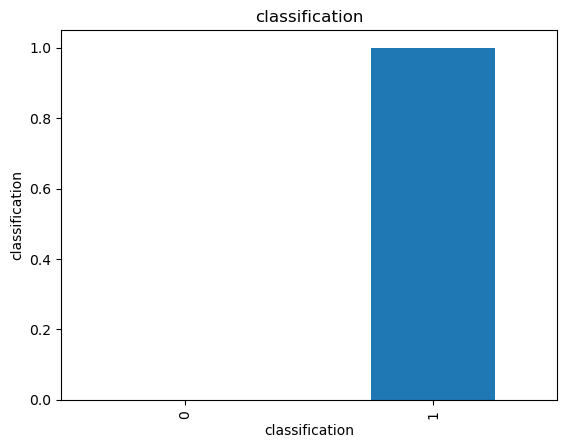

In [36]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['classification'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('classification')
    plt.title(feature)
    plt.show()


In [37]:
#Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 11


In [38]:
continuous_feature

['id', 'age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

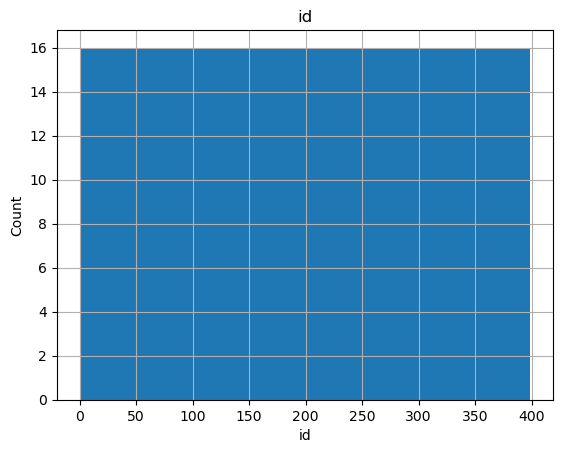

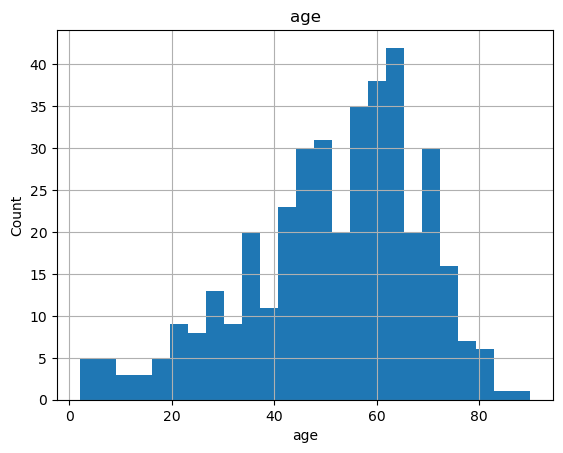

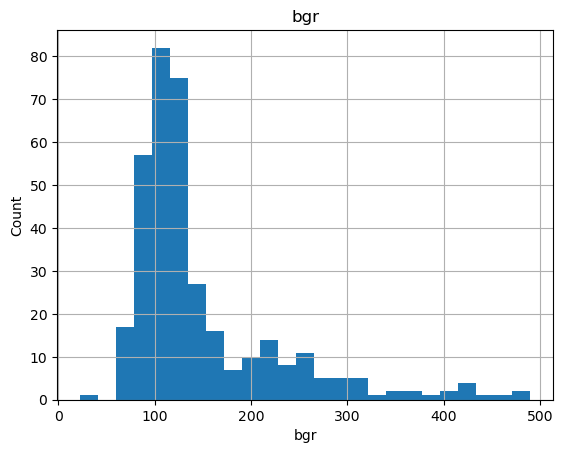

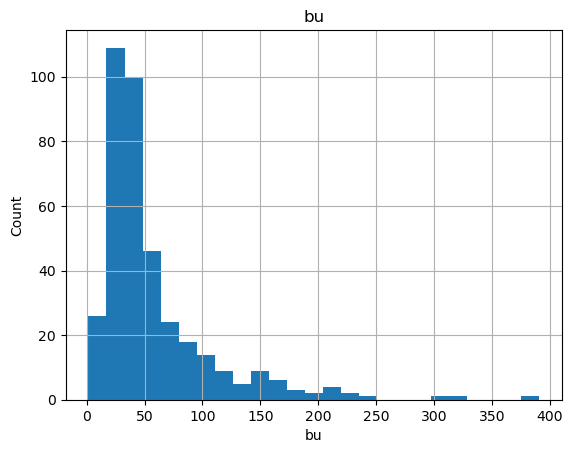

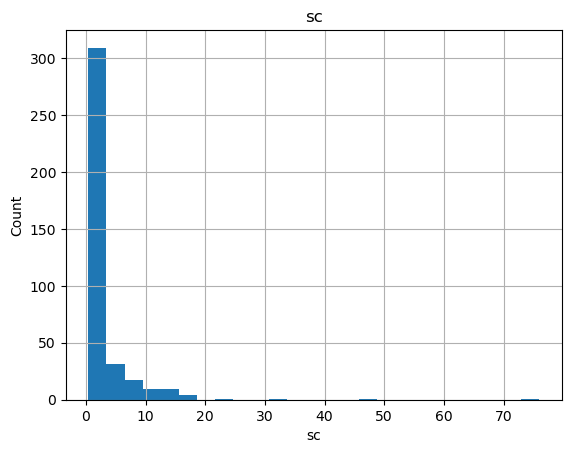

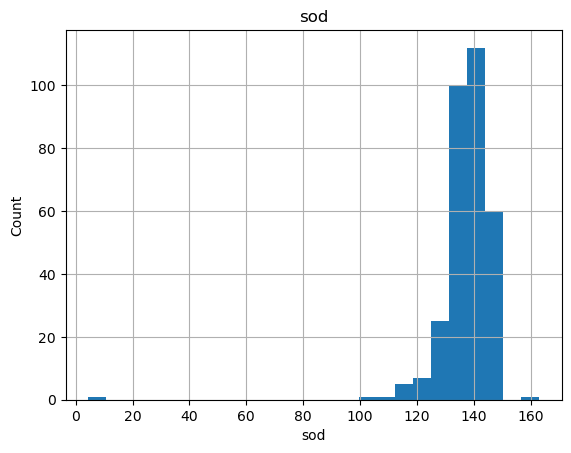

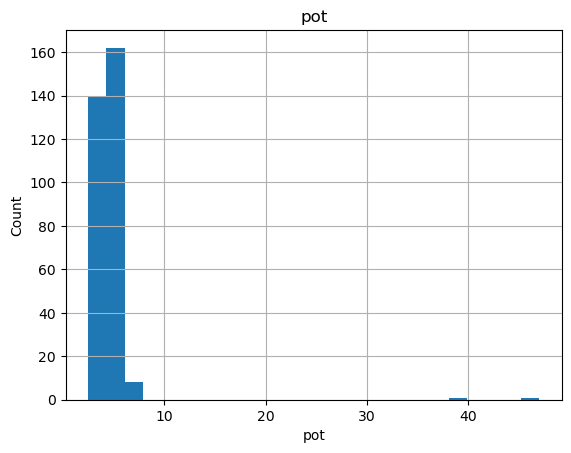

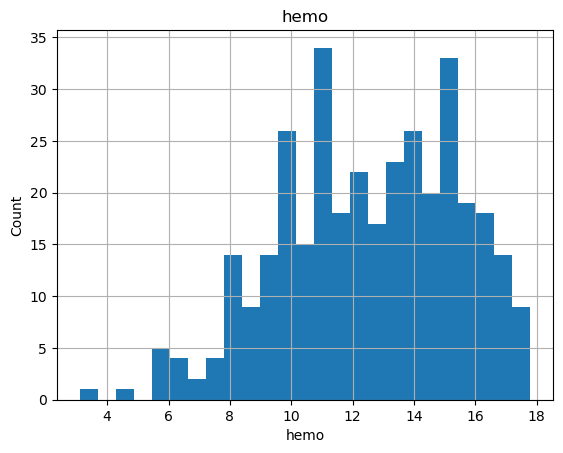

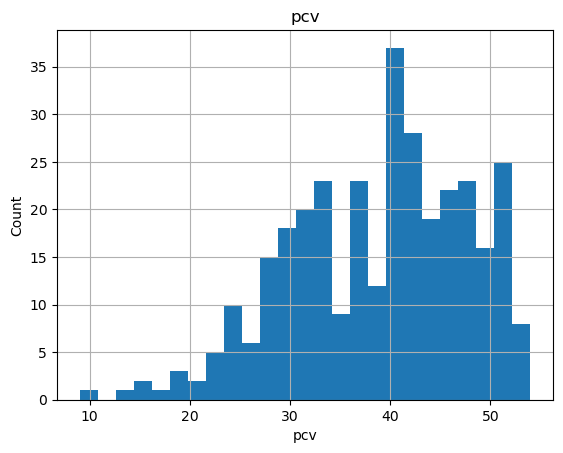

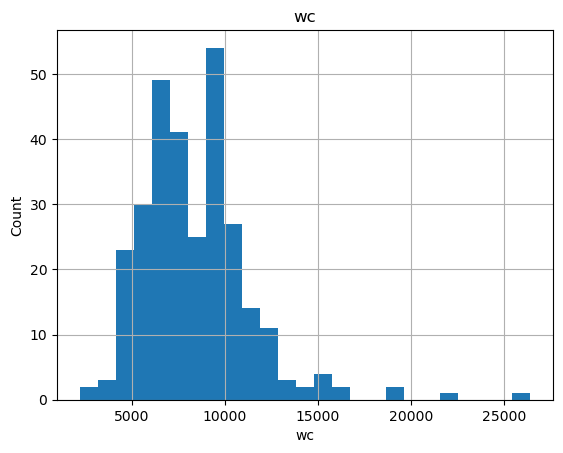

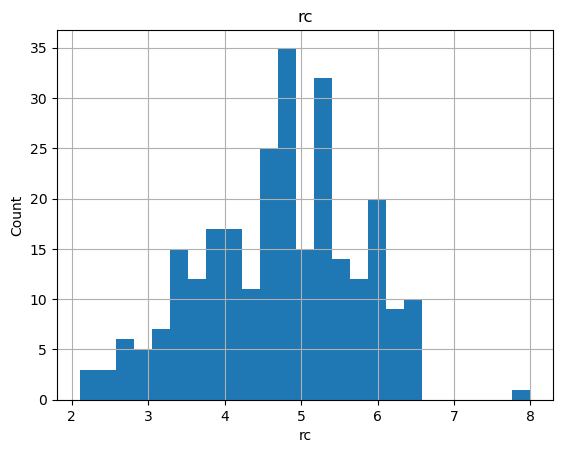

In [39]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


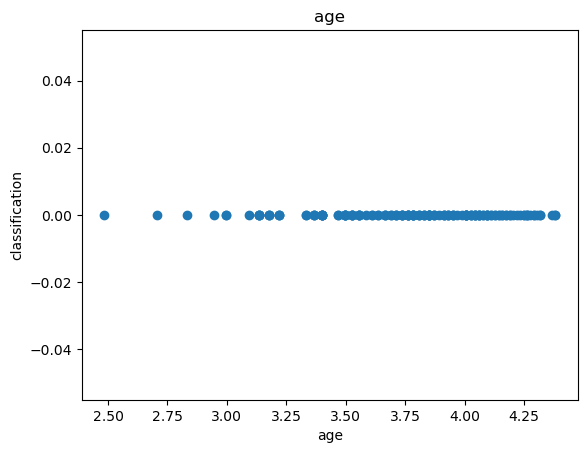

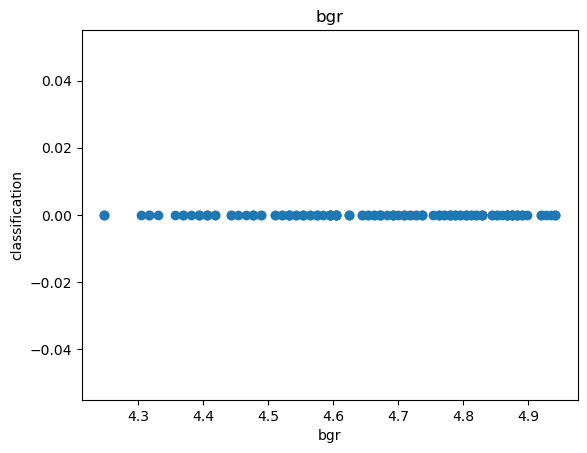

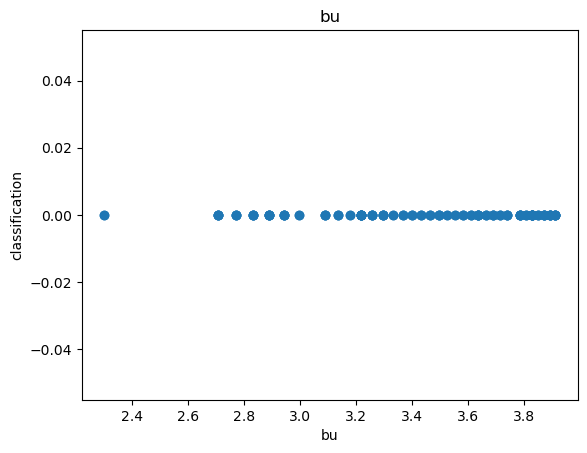

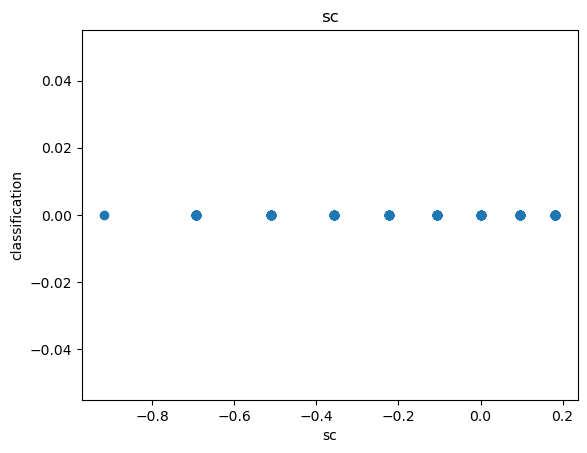

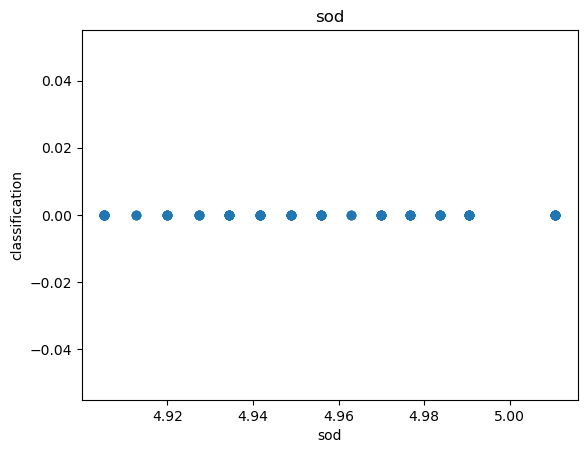

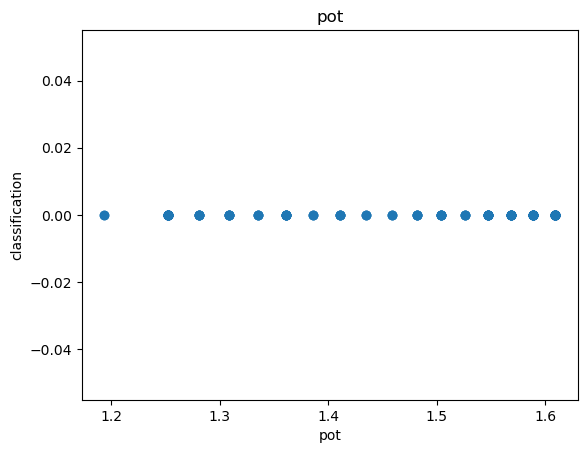

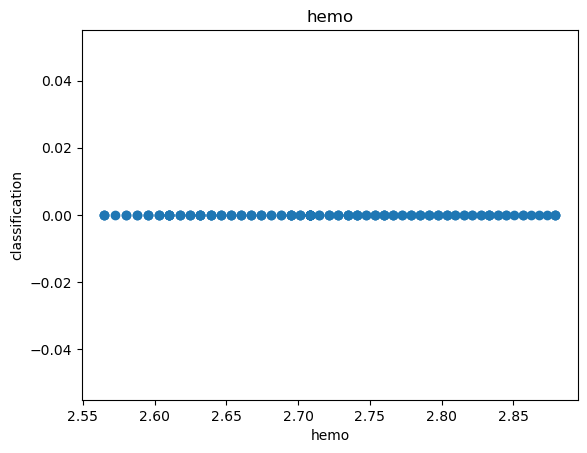

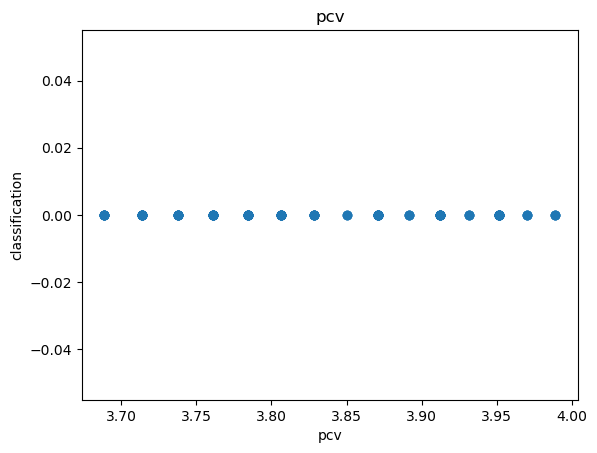

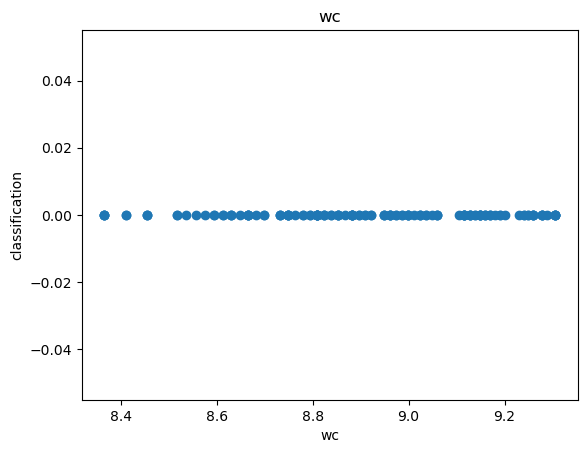

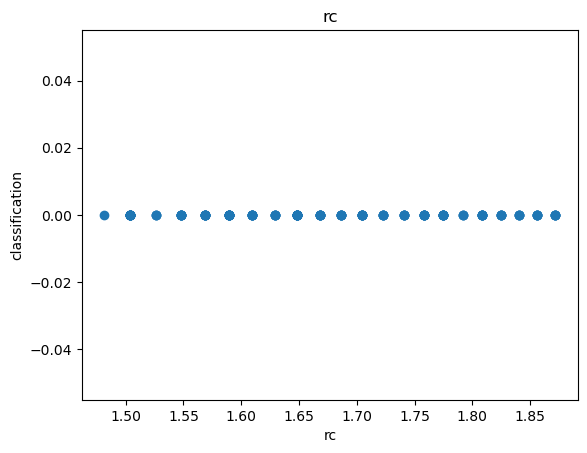

In [40]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['classification']=np.log(data['classification'])
        plt.scatter(data[feature],data['classification'])
        plt.xlabel(feature)
        plt.ylabel('classification')
        plt.title(feature)
        plt.show()

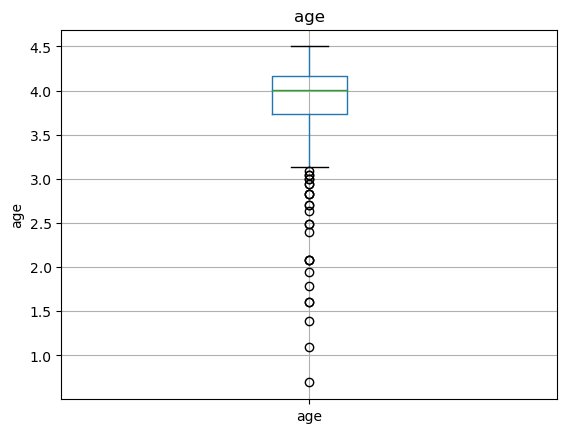

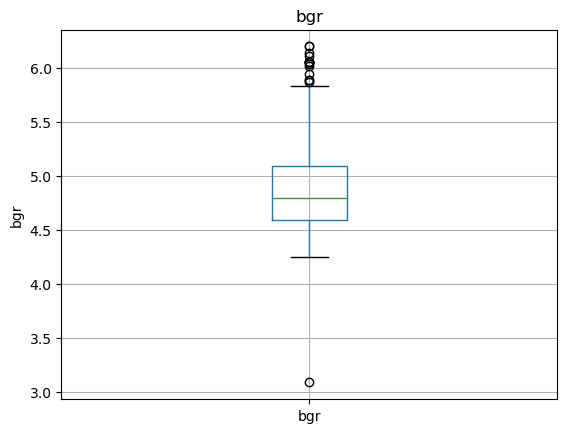

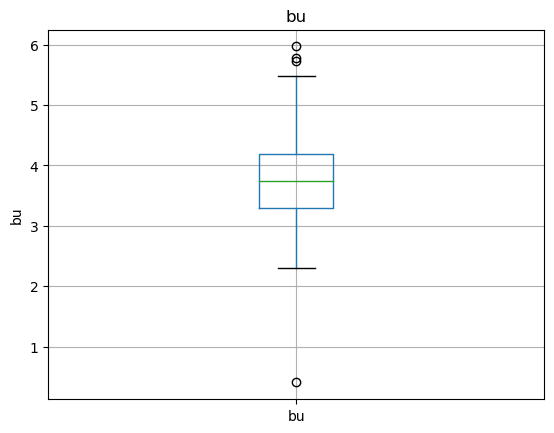

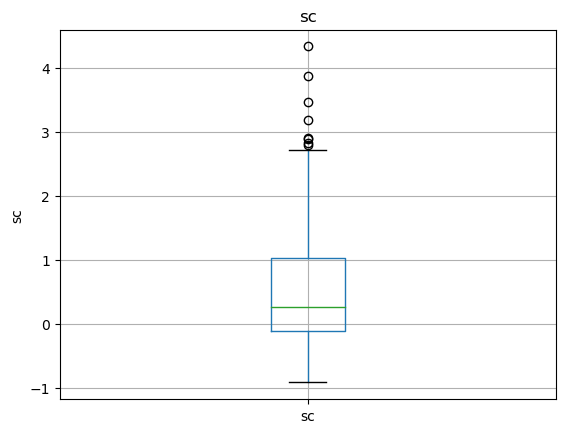

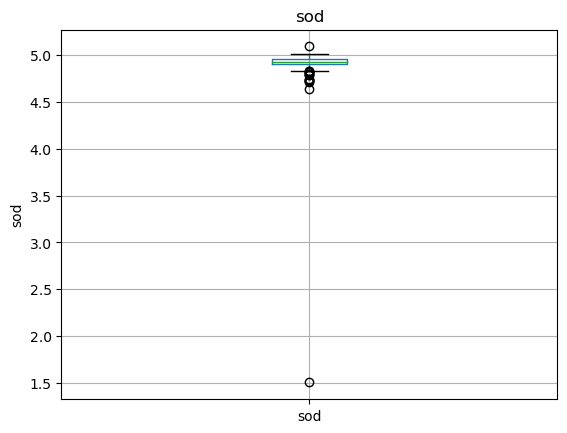

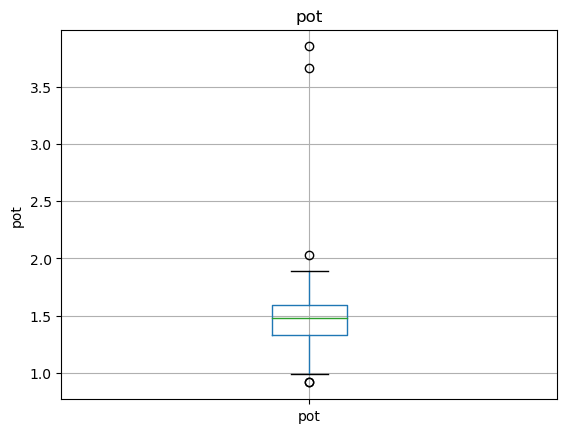

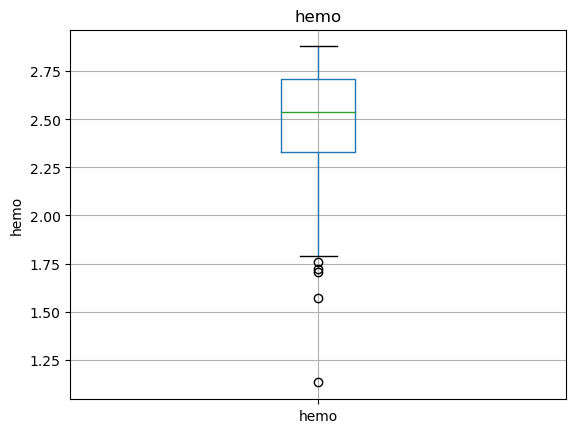

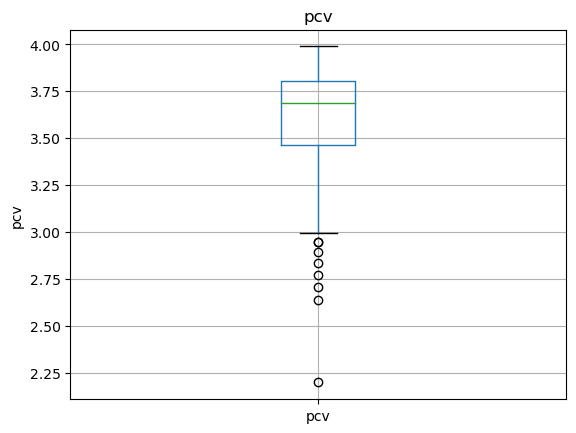

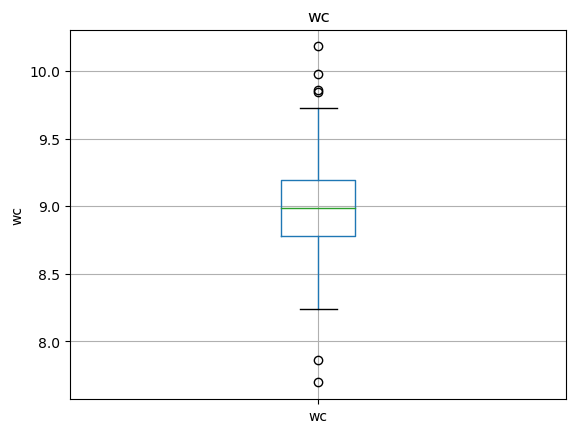

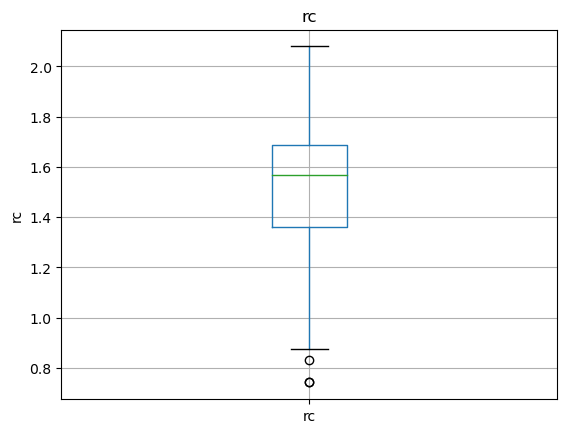

In [41]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [42]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,1.648659,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,1.360977,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,1.526056,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,1.589235,no,no,no,good,no,no,1
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,1.824549,no,no,no,good,no,no,1
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,1.686399,no,no,no,good,no,no,1
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,1.774952,no,no,no,good,no,no,1


In [43]:
#Categorical Variables
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [44]:
dataset[categorical_features].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [44]:
for feature in categorical_features:
    print("catagories of " + feature + " are " + str(len(dataset[feature].unique())))

catagories of rbc are 3
catagories of pc are 3
catagories of pcc are 3
catagories of ba are 3
catagories of pcv are 45
catagories of wc are 93
catagories of rc are 47
catagories of htn are 3
catagories of dm are 6
catagories of cad are 4
catagories of appet are 3
catagories of pe are 3
catagories of ane are 3


In [25]:
#for feature in categorical_features:
 #   print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

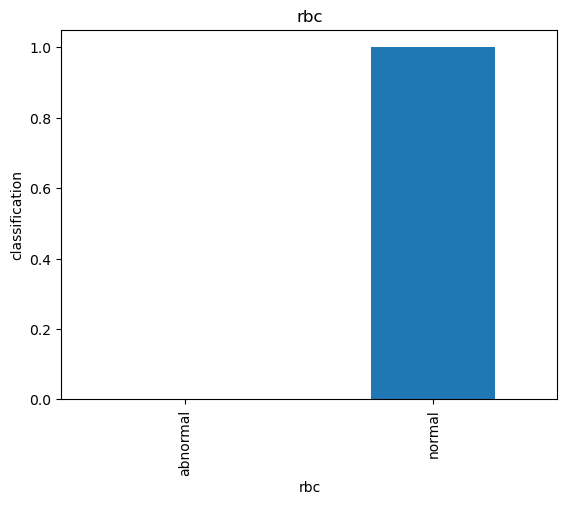

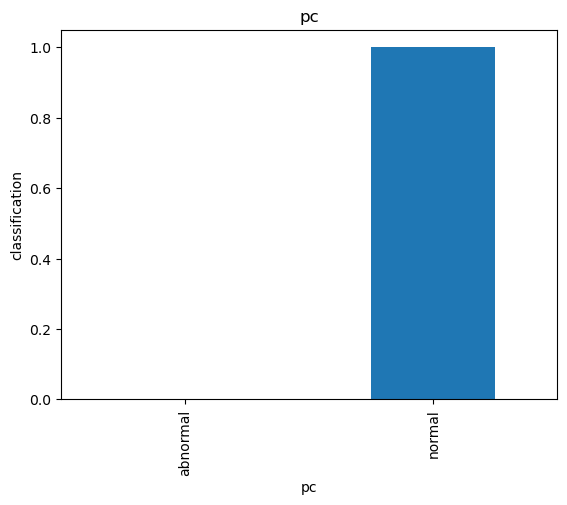

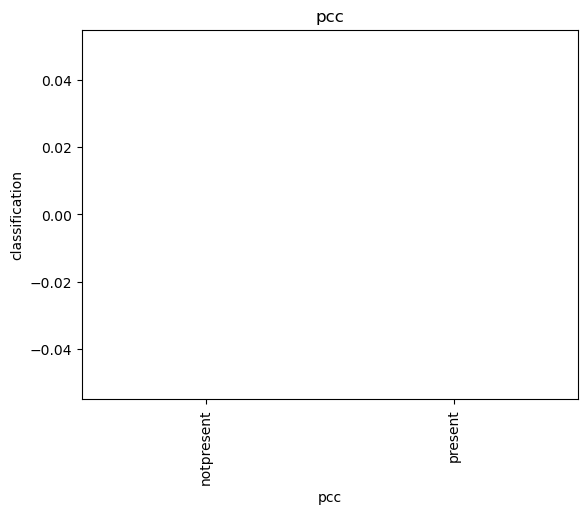

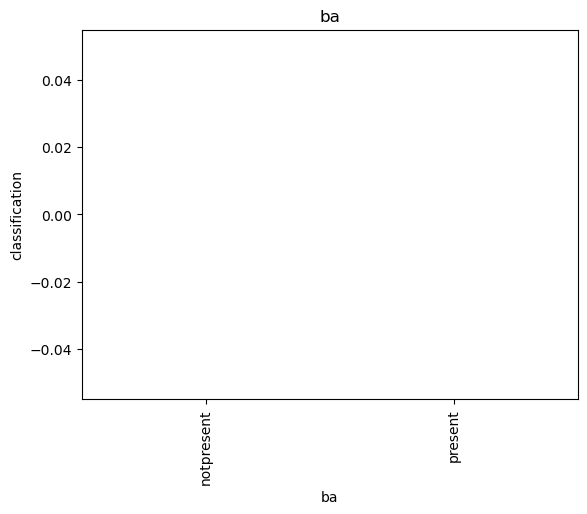

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


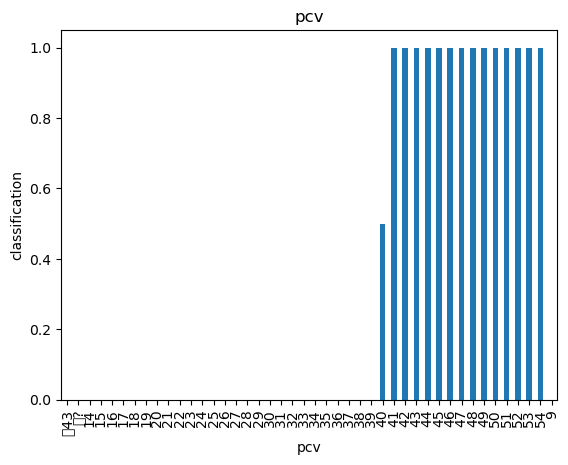

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


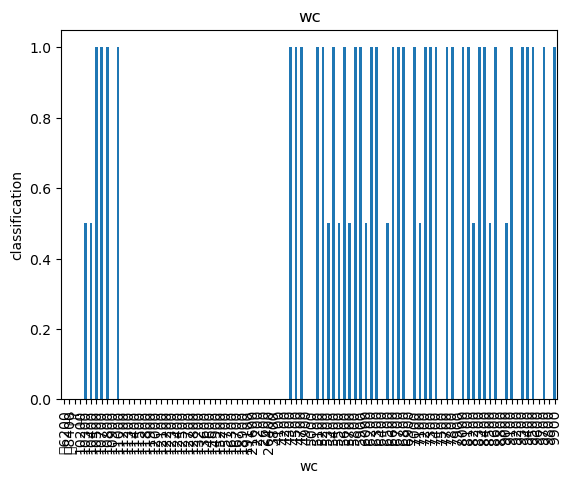

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


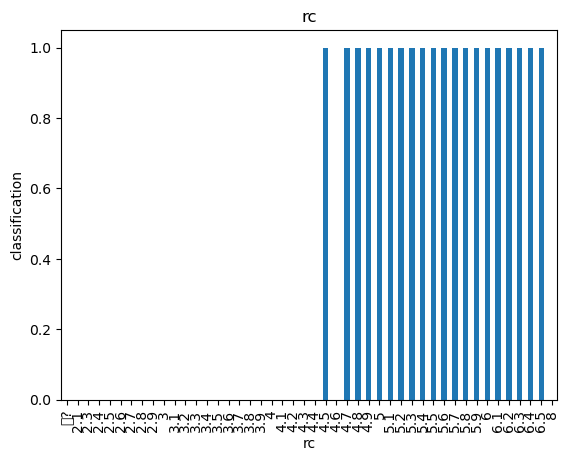

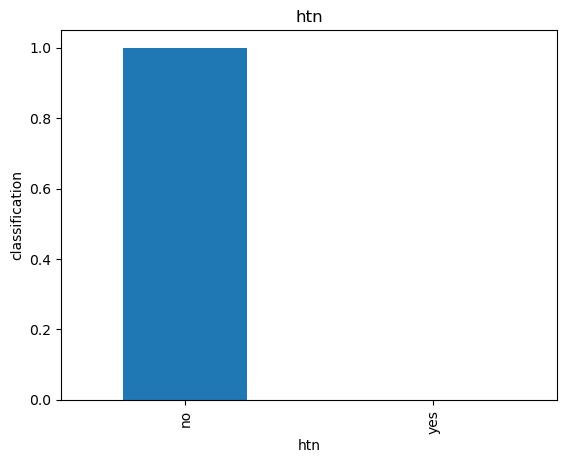

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


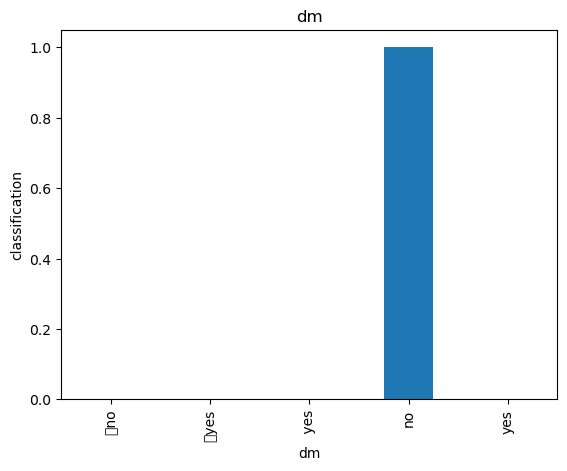

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


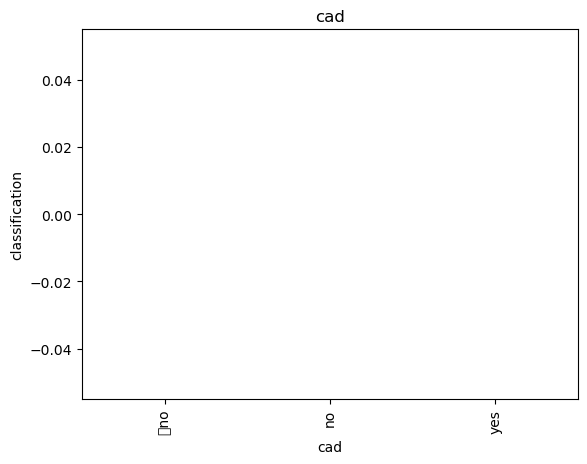

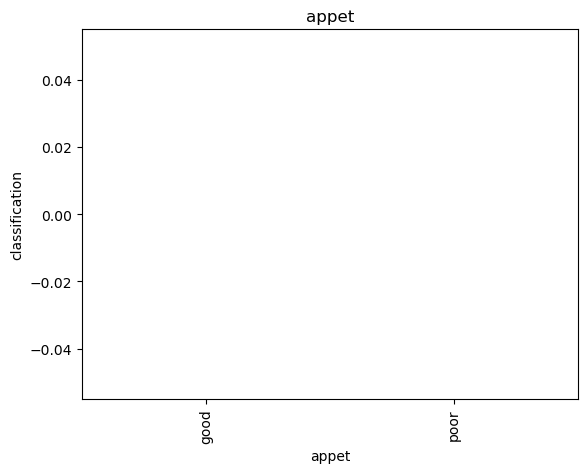

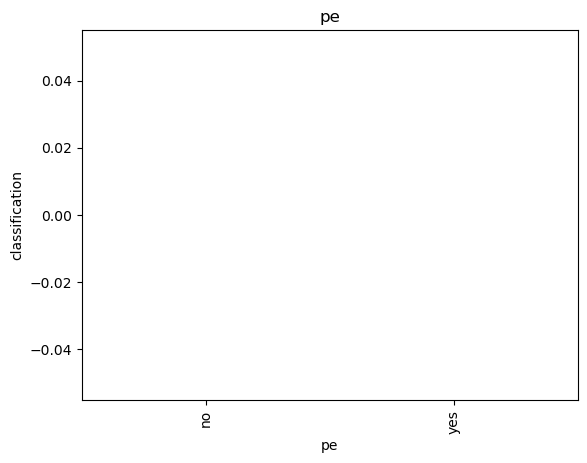

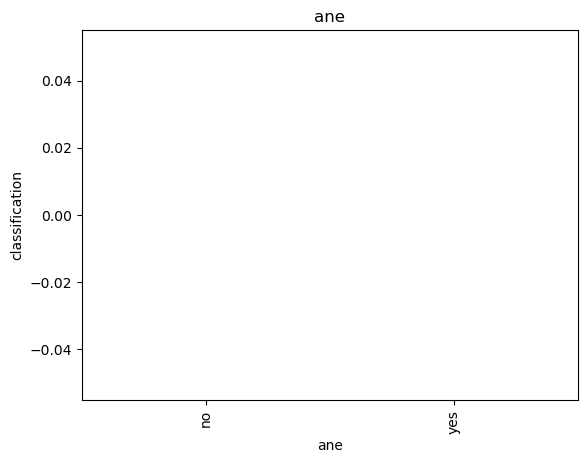

In [45]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['classification'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('classification')
    plt.title(feature)
    plt.show()

In [55]:
pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv('Tuned-kidney_disease.csv')

In [56]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.020,1,0,-1,1,0,0,121,36.0,1.2,-1.0,-1.0,15.4,44,7800,5.2,1,1,0,1,0,0,ckd
1,1,7,50,1.020,4,0,-1,1,0,0,-1,18.0,0.8,-1.0,-1.0,11.3,38,6000,-1.0,0,0,0,1,0,0,ckd
2,2,62,80,1.010,2,3,1,1,0,0,423,53.0,1.8,-1.0,-1.0,9.6,31,7500,-1.0,0,1,0,0,0,1,ckd
3,3,48,70,1.005,4,0,1,0,1,0,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,ckd
4,4,51,80,1.010,2,0,1,1,0,0,106,26.0,1.4,-1.0,-1.0,11.6,35,7300,4.6,0,0,0,1,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1.020,0,0,1,1,0,0,140,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0,0,0,1,0,0,notckd
396,396,42,70,1.025,0,0,1,1,0,0,75,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0,0,0,1,0,0,notckd
397,397,12,80,1.020,0,0,1,1,0,0,100,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0,0,0,1,0,0,notckd
398,398,17,60,1.025,0,0,1,1,0,0,114,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0,0,0,1,0,0,notckd


In [58]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  '% missing values')

id 0.0 % missing values
age 0.0 % missing values
bp 0.0 % missing values
sg 0.0 % missing values
al 0.0 % missing values
su 0.0 % missing values
rbc 0.0 % missing values
pc 0.0 % missing values
pcc 0.0 % missing values
ba 0.0 % missing values
bgr 0.0 % missing values
bu 0.0 % missing values
sc 0.0 % missing values
sod 0.0 % missing values
pot 0.0 % missing values
hemo 0.0 % missing values
pcv 0.0 % missing values
wc 0.0 % missing values
rc 0.0 % missing values
htn 0.0 % missing values
dm 0.0 % missing values
cad 0.0 % missing values
appet 0.0 % missing values
pe 0.0 % missing values
ane 0.0 % missing values
classification 0.0 % missing values


In [69]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero



,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
930,0.000000,0.75,0.863636,0.777778,0.50,0.049180,0.0,0.75,0.75,1.00,1.0,0.559760,0.523250,0.000000,0.666667,0.000000,0.2,0.8,1.000000,0.75,1.0,0.75
656,0.000000,0.75,0.363636,0.444444,0.75,0.049180,0.0,0.50,0.25,1.00,1.0,0.434539,0.406196,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.25,1.0,0.75
45,0.588235,0.75,0.954545,0.888889,0.50,0.098361,1.0,1.00,0.25,1.00,1.0,0.627205,0.586296,0.333333,1.000000,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75
1348,0.000000,0.75,0.454545,0.666667,0.50,0.163934,0.0,0.75,1.00,1.00,1.0,0.566920,0.529943,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0,0.75
55,0.000000,0.75,0.363636,0.555556,0.50,0.737705,0.0,0.50,0.25,0.75,1.0,0.549026,0.513216,0.000000,0.333333,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75


,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
529,0.000000,0.75,0.727273,0.555556,0.250,0.540984,1.0,0.50,0.25,0.5,1.0,0.764014,0.714182,0.333333,0.333333,0.666667,0.6,0.8,0.666667,0.50,1.0,0.25
491,0.176471,0.75,0.363636,0.555556,0.750,0.934426,0.0,0.50,0.25,0.5,1.0,0.398758,0.549294,0.333333,0.000000,0.666667,0.6,0.8,0.333333,0.25,1.0,0.75
459,0.176471,0.75,0.136364,0.444444,0.375,0.983607,0.0,0.50,0.25,0.5,1.0,0.406964,0.453307,0.333333,0.666667,0.333333,0.6,0.4,0.333333,0.25,1.0,0.75
279,0.235294,0.75,0.772727,0.666667,0.500,0.524590,1.0,0.75,0.25,1.0,1.0,0.469855,0.636999,0.000000,0.333333,0.333333,0.6,0.8,1.000000,0.50,1.0,0.75
655,0.823529,0.25,0.090909,0.555556,0.500,0.655738,0.0,0.50,0.25,0.5,1.0,0.171149,0.419061,0.000000,0.333333,0.000000,0.2,0.4,0.333333,0.25,1.0,0.50


LinearRegression()

array([12.2669902 , 12.00584276, 11.68972788, 12.2984148 , 11.4231846 ,
       11.50019469, 12.4432993 , 11.68696077, 13.09965892, 11.96744878,
       12.27497929, 11.97043307, 12.2553517 , 11.68076387, 11.74173556,
       11.8708421 , 12.41297276, 11.70391123, 11.80268242, 12.16227634,
       11.71085292, 11.92299144, 11.48287752, 12.01107536, 12.13313126,
       12.16006538, 12.07601612, 11.26277066, 12.48689711, 11.56736324,
       11.93611927, 12.22081948, 11.93719436, 12.62410248, 12.65912406,
       12.1182906 , 12.54908431, 11.75249301, 12.37237221, 12.7231209 ,
       12.33961657, 11.8164409 , 12.23260887, 12.64179009, 12.73639527,
       11.80274632, 11.64124454, 11.80305892, 11.9530746 , 11.45342872,
       12.88469497, 11.88741461, 12.00731991, 11.26884035, 12.2964643 ,
       11.65531191, 11.64420322, 12.32511548, 11.80621722, 11.44184249,
       11.91987026, 11.72504733, 11.84094012, 11.97291463, 12.21444082,
       11.98513379, 11.7482726 , 12.31886567, 11.92150098, 12.23

0.8821390525296797

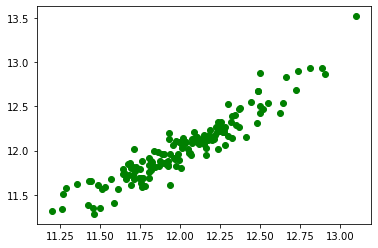

In [48]:
#All spaces in those columns containing numeric values have been replaced with -1. 
#One hot encoding has been applied on categorical columns and spaces replaced with -1.
Tuneddataset=pd.read_csv('Tuned-kidney_disease.csv')

In [49]:
Tuneddataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80,1.020,1,0,-1,1,0,0,121,36.0,1.2,-1.0,-1.0,15.4,44,7800,5.2,1,1,0,1,0,0,ckd
1,1,7,50,1.020,4,0,-1,1,0,0,-1,18.0,0.8,-1.0,-1.0,11.3,38,6000,-1.0,0,0,0,1,0,0,ckd
2,2,62,80,1.010,2,3,1,1,0,0,423,53.0,1.8,-1.0,-1.0,9.6,31,7500,-1.0,0,1,0,0,0,1,ckd
3,3,48,70,1.005,4,0,1,0,1,0,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,ckd
4,4,51,80,1.010,2,0,1,1,0,0,106,26.0,1.4,-1.0,-1.0,11.6,35,7300,4.6,0,0,0,1,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1.020,0,0,1,1,0,0,140,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0,0,0,1,0,0,notckd
396,396,42,70,1.025,0,0,1,1,0,0,75,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0,0,0,1,0,0,notckd
397,397,12,80,1.020,0,0,1,1,0,0,100,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0,0,0,1,0,0,notckd
398,398,17,60,1.025,0,0,1,1,0,0,114,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0,0,0,1,0,0,notckd
